### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [20]:
date = '2018-11-09_13h02'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/' + date + '/'
worker_list = [8,16,32,64]

In [21]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [32]:
# read data into pandas dataframe
file_name = 'dstat_server_cpu_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,cpu_mean,cpu_std
0,6,8,11.162906,0.275633
1,6,16,11.190803,0.162809
2,6,32,12.370460,0.398866
3,6,64,15.103624,0.607541
4,24,8,30.110911,0.420498
5,24,16,28.557357,0.602979
6,24,32,29.001887,0.659899
7,24,64,30.874662,0.754804
8,48,8,28.344479,0.482634
9,48,16,34.640357,2.025011


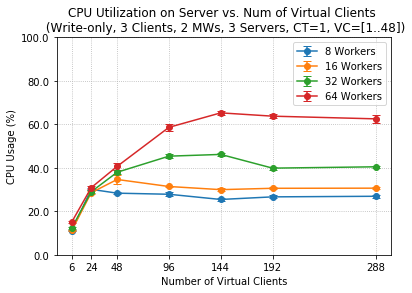

In [33]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MWs, 3 Servers, CT=1, VC=[1..48])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['cpu_mean']
    std = df_c_cut['cpu_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [44]:
# read data into pandas dataframe
file_name = 'dstat_mw_netsend_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netsend_mean,netsend_std
0,6,8,2.040080e+07,4.614704e+05
1,6,16,2.052980e+07,3.002477e+05
2,6,32,2.054116e+07,1.124189e+05
3,6,64,2.113606e+07,3.086137e+05
4,24,8,5.249838e+07,1.266949e+06
5,24,16,5.355681e+07,7.811246e+05
6,24,32,5.254624e+07,7.879657e+05
7,24,64,5.182439e+07,1.380002e+06
8,48,8,5.813556e+07,1.704416e+05
9,48,16,5.453438e+07,1.589059e+07


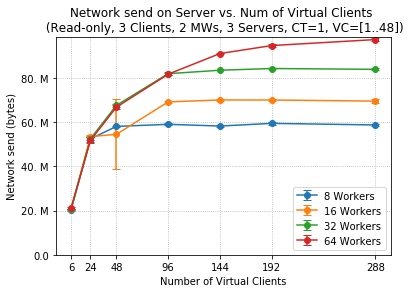

In [45]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (Read-only, 3 Clients, 2 MWs, 3 Servers, CT=1, VC=[1..48])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netsend_mean']
    std = df_c_cut['netsend_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netsend_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network recv activity plot

In [46]:
# read data into pandas dataframe
file_name = 'dstat_mw_netrecv_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netrecv_mean,netrecv_std
0,6,8,7.611915e+06,1.719457e+05
1,6,16,7.660058e+06,1.120638e+05
2,6,32,7.660325e+06,4.244322e+04
3,6,64,7.834680e+06,1.181156e+05
4,24,8,1.958560e+07,4.725556e+05
5,24,16,1.998055e+07,2.912403e+05
6,24,32,1.960349e+07,2.939402e+05
7,24,64,1.932679e+07,5.168190e+05
8,48,8,2.168868e+07,6.340826e+04
9,48,16,2.034521e+07,5.927978e+06


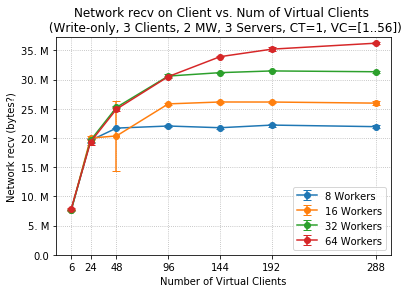

In [47]:
f = plt.figure()
plt.title("Network recv on Client vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MW, 3 Servers, CT=1, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netrecv_mean']
    std = df_c_cut['netrecv_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network recv (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netrecv_mean']))
plt.legend()


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/"+date+"/"+file_name[:-4]+".png", dpi = 150)